# CAP4770 Final Project
#### Created by: Matt Strenges, Tuyet Phan, and Mary Szabo
#### Summer 2023
Data source
https://www.datasciencedata.com/auto-insurance-churn-data

In [23]:
import pylab
import matplotlib
import pandas as pd
import numpy as np
import os

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split,RandomizedSearchCV, train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import randint
from IPython.display import Image

df = pd.read_csv("full_auto_insurance_data.csv")

In [46]:
display(df) #Original DF

,INDIVIDUAL_ID,acct_terminated,ADDRESS_ID,CURR_ANN_AMT,DAYS_TENURE,CUST_ORIG_DATE,AGE_IN_YEARS,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,MARITAL_STATUS,HOME_MARKET_VALUE,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT
0,2.213000e+11,0.0,5.213000e+11,818.87,1454.0,2018-12-09,44.474,22500.00,1.0,15.0,1,50000 - 74999,1.0,1.0,1.0
1,2.213001e+11,0.0,5.213001e+11,974.19,1795.0,2018-01-02,72.559,27500.00,0.0,2.0,0,50000 - 74999,1.0,0.0,0.0
2,2.213007e+11,0.0,5.213002e+11,967.37,4818.0,2009-09-23,55.444,42500.00,0.0,10.0,1,75000 - 99999,1.0,0.0,0.0
3,2.213016e+11,1.0,5.213006e+11,992.40,130.0,2022-07-25,53.558,125000.00,1.0,6.0,1,175000 - 199999,1.0,0.0,1.0
4,2.213016e+11,0.0,5.213006e+11,784.63,5896.0,2006-10-11,50.220,87500.00,1.0,4.0,1,225000 - 249999,1.0,1.0,1.0
5,2.213027e+11,0.0,5.213010e+11,909.91,484.0,2021-08-05,32.641,52500.00,0.0,2.0,1,125000 - 149999,1.0,0.0,1.0
6,2.213007e+11,0.0,5.213003e+11,1084.04,2896.0,2014-12-28,70.806,125000.00,1.0,8.0,1,100000 - 124999,1.0,0.0,1.0
7,2.213022e+11,0.0,5.213008e+11,1277.37,4096.0,2011-09-15,45.969,47500.00,0.0,12.0,1,125000 - 149999,1.0,0.0,1.0
8,2.213029e+11,1.0,5.213011e+11,917.20,2107.0,2017-02-24,56.389,47500.00,0.0,6.0,0,50000 - 74999,1.0,1.0,1.0
9,2.213012e+11,0.0,5.213005e+11,1095.39,3387.0,2013-08-24,64.307,32500.00,0.0,15.0,1,25000 - 49999,1.0,0.0,0.0


In [25]:
#Processing Data
df.loc[df['CURR_ANN_AMT'].isnull(), 'CURR_ANN_AMT'] = 931.06 #mean CURR_ANN_AMT is 931
df.loc[df['DAYS_TENURE'].isnull(), 'DAYS_TENURE'] = 3482.62 # mean DAYS_TENURE is 3482
df.loc[df['AGE_IN_YEARS'].isnull(), 'AGE_IN_YEARS'] = 55.44 # mean AGE_IN_YEARS is 55.44
df.loc[df['INCOME'].isnull(), 'INCOME'] = 80372.36 # mean INCOME is 80372.36
df.loc[df['HAS_CHILDREN'].isnull(), 'HAS_CHILDREN'] = 0.0 # mode HAS_CHILDREN is 0
df.loc[df['LENGTH_OF_RESIDENCE'].isnull(), 'LENGTH_OF_RESIDENCE'] = 6.80 # mean LENGTH_OF_RESIDENCE is 6.80
df.loc[df['MARITAL_STATUS'].isnull(), 'MARITAL_STATUS'] = "Married" # mode MARITAL_STATUS is Married
df.loc[df['MARITAL_STATUS']=="Married", 'MARITAL_STATUS'] = 1 #Married is a 1
df.loc[df['MARITAL_STATUS']=="Single", 'MARITAL_STATUS'] = 0 #Single is a 0
df.loc[df['HOME_MARKET_VALUE'].isnull(), 'HOME_MARKET_VALUE'] = "75000 - 99999" # mode HOME_MARKET_VALUE is 75000 - 99999
df.loc[df['HOME_OWNER'].isnull(), 'HOME_OWNER'] = 1 # mode HOME_OWNER is 1
df.loc[df['COLLEGE_DEGREE'].isnull(), 'COLLEGE_DEGREE'] = 0 # mode COLLEGE_DEGREE is 0
df.loc[df['GOOD_CREDIT'].isnull(), 'GOOD_CREDIT'] = 1 # mode GOOD_CREDIT is 1
df.loc[df['ACCT_SUSPD_DATE'].notnull(), 'acct_terminated'] = 1 #terminated=1
df.loc[df['ACCT_SUSPD_DATE'].isnull(), 'acct_terminated'] = 0 #not terminated=0
df = df.drop('ACCT_SUSPD_DATE', axis=1)
df = df.drop('DATE_OF_BIRTH', axis=1)
df = df.drop('SOCIAL_SECURITY_NUMBER', axis=1)
df = df.drop('LATITUDE', axis=1)
df = df.drop('LONGITUDE', axis=1)
df = df.drop('STREET_ADDRESS', axis=1)
df = df.drop('CITY', axis=1)
df = df.drop('STATE', axis=1)
df = df.drop('COUNTY', axis=1)
df = df.dropna(axis=0)
pd.set_option('display.max_columns', None) #Displays every column
df #Processed DF

#These data columns were not changed as I don't believe we are using them and changing them would be complicated.
#ADDRESS_ID was not changed
#CUST_ORIG_DATE was not changed
#DATE_OF_BIRTH was not changed
#SOCIAL_SECURITY_NUMBER was not changed
#LATITUDE & LONGITUDE were not changed
#STREET, CITY, STATE & COUNTY were not changed

,INDIVIDUAL_ID,acct_terminated,ADDRESS_ID,CURR_ANN_AMT,DAYS_TENURE,CUST_ORIG_DATE,AGE_IN_YEARS,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,MARITAL_STATUS,HOME_MARKET_VALUE,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT
0,2.213000e+11,0.0,5.213000e+11,818.87,1454.0,2018-12-09,44.474,22500.00,1.0,15.0,1,50000 - 74999,1.0,1.0,1.0
1,2.213001e+11,0.0,5.213001e+11,974.19,1795.0,2018-01-02,72.559,27500.00,0.0,2.0,0,50000 - 74999,1.0,0.0,0.0
2,2.213007e+11,0.0,5.213002e+11,967.37,4818.0,2009-09-23,55.444,42500.00,0.0,10.0,1,75000 - 99999,1.0,0.0,0.0
3,2.213016e+11,1.0,5.213006e+11,992.40,130.0,2022-07-25,53.558,125000.00,1.0,6.0,1,175000 - 199999,1.0,0.0,1.0
4,2.213016e+11,0.0,5.213006e+11,784.63,5896.0,2006-10-11,50.220,87500.00,1.0,4.0,1,225000 - 249999,1.0,1.0,1.0
5,2.213027e+11,0.0,5.213010e+11,909.91,484.0,2021-08-05,32.641,52500.00,0.0,2.0,1,125000 - 149999,1.0,0.0,1.0
6,2.213007e+11,0.0,5.213003e+11,1084.04,2896.0,2014-12-28,70.806,125000.00,1.0,8.0,1,100000 - 124999,1.0,0.0,1.0
7,2.213022e+11,0.0,5.213008e+11,1277.37,4096.0,2011-09-15,45.969,47500.00,0.0,12.0,1,125000 - 149999,1.0,0.0,1.0
8,2.213029e+11,1.0,5.213011e+11,917.20,2107.0,2017-02-24,56.389,47500.00,0.0,6.0,0,50000 - 74999,1.0,1.0,1.0
9,2.213012e+11,0.0,5.213005e+11,1095.39,3387.0,2013-08-24,64.307,32500.00,0.0,15.0,1,25000 - 49999,1.0,0.0,0.0


In [47]:
#col_names = [ 'CURR_ANN_AMT', 'DAYS_TENURE', 'AGE_IN_YEARS', 'INCOME', 'HAS_CHILDREN', 'LENGTH_OF_RESIDENCE',   'HOME_OWNER', 'COLLEGE_DEGREE', 'GOOD_CREDIT']
cols = ['CURR_ANN_AMT', 'DAYS_TENURE', 'AGE_IN_YEARS', 'INCOME', 'HAS_CHILDREN', 'LENGTH_OF_RESIDENCE',  'HOME_OWNER', 'COLLEGE_DEGREE', 'GOOD_CREDIT']
X = df[cols]
y = df.acct_terminated
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.816965747497


In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

        0.0       0.90      0.89      0.90    603253
        1.0       0.25      0.28      0.26     80843

avg / total       0.82      0.82      0.82    684096



In [49]:
rf = RandomForestClassifier(max_depth=1)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [50]:
y_pred2 = rf.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)
print("Random Forest Accuracy:", accuracy2)

Random Forest Accuracy: 0.881825065488


In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred2))

             precision    recall  f1-score   support

        0.0       0.88      1.00      0.94    603253
        1.0       0.00      0.00      0.00     80843

avg / total       0.78      0.88      0.83    684096



/usr/lib/python3/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


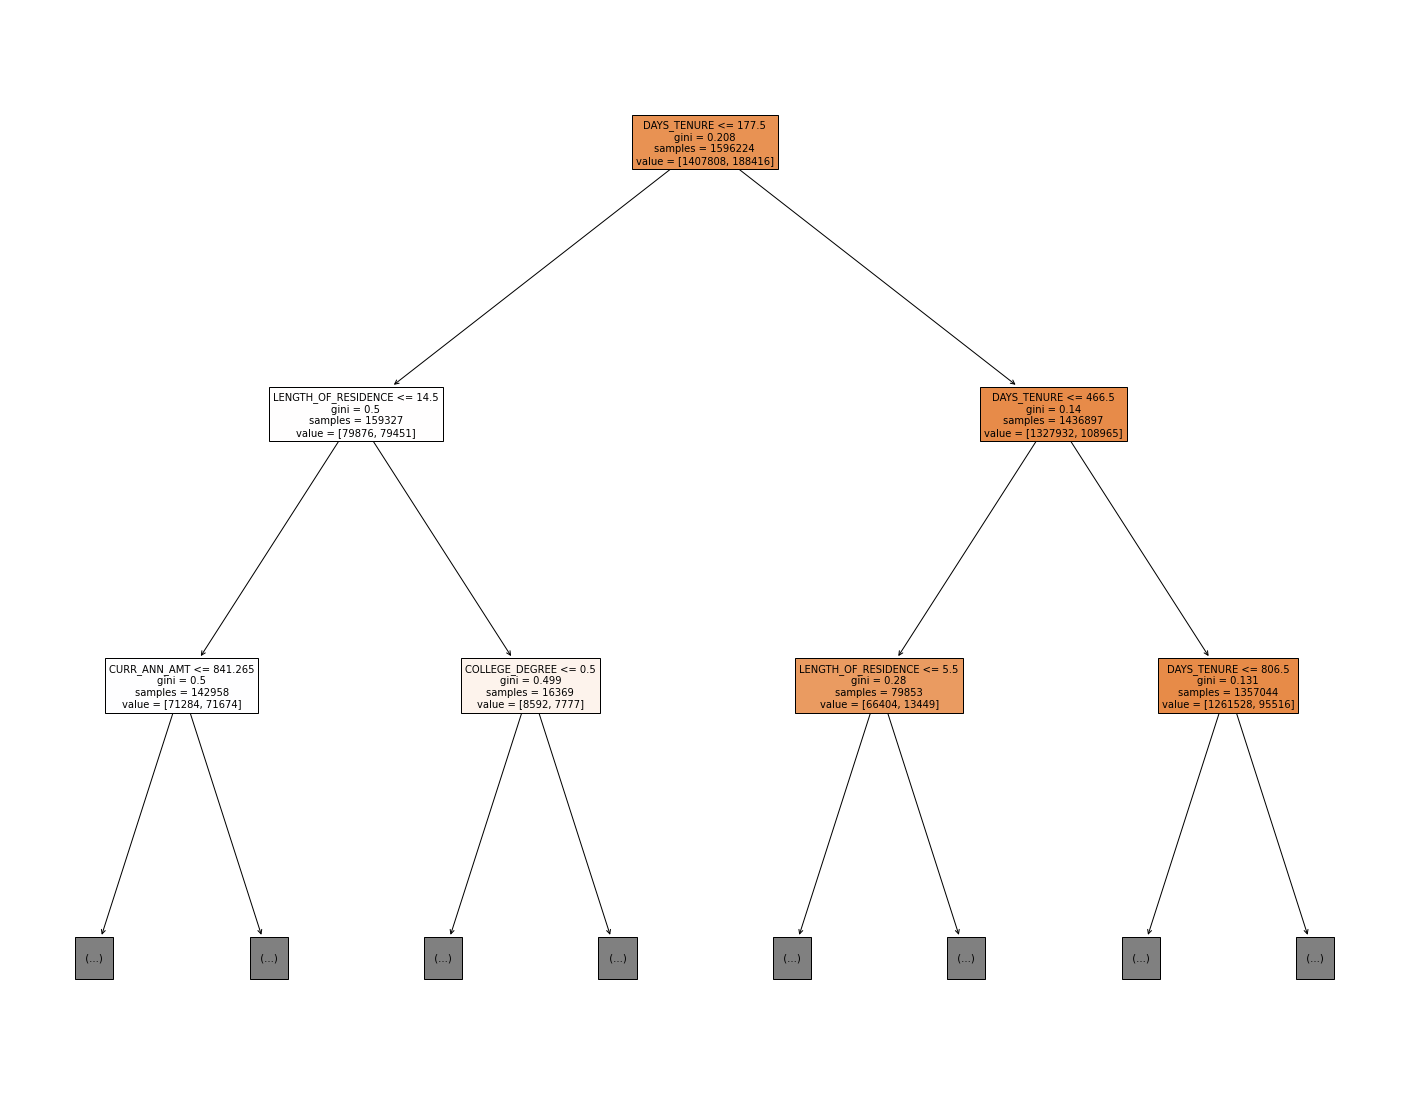

In [9]:
from matplotlib import pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names=cols, filled=True, max_depth=2)

#left child = True
#Right child= False

#Gini Index
#0=perfect equality
#1=very unequal

In [10]:
import seaborn as sns
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

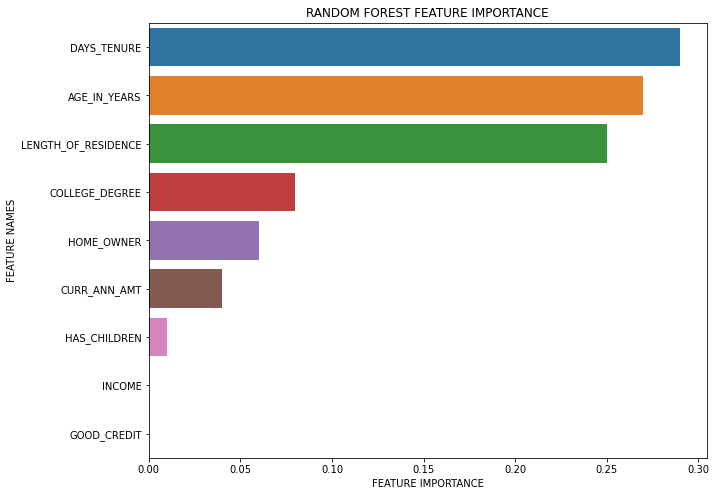

In [11]:
plot_feature_importance(rf.feature_importances_,cols,'RANDOM FOREST')

## Oversampling

In [12]:
# https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/

from imblearn.over_sampling import RandomOverSampler
from collections import Counter
# from sklearn.model_selection import train_test_split

# Separate the independent variables from the dependent variable
X_over = df.drop('acct_terminated', axis=1)  # Features (independent variables)
y_over = df['acct_terminated']  # Target variable (dependent variable)

# Create the RandomOverSampler instance targeting the minority class
oversampler = RandomOverSampler(sampling_strategy='minority')

# Apply oversampling to the dataset
X_resampled, y_resampled = oversampler.fit_resample(X_over, y_over)

print("Before oversampling: ", Counter(y_over))
print("After oversampling: ", Counter(y_resampled))

Before oversampling:  Counter({0.0: 2011061, 1.0: 269259})
After oversampling:  Counter({0.0: 2011061, 1.0: 2011061})


In [13]:
# Convert the resampled arrays back to DataFrames
X_resampled_df = pd.DataFrame(X_resampled, columns=X_over.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['acct_terminated'])

resampled_df = pd.concat([X_resampled_df, y_resampled_df], axis=1)

print(resampled_df)

         INDIVIDUAL_ID    ADDRESS_ID  CURR_ANN_AMT  DAYS_TENURE  \
0         2.213000e+11  5.213000e+11        818.87       1454.0   
1         2.213001e+11  5.213001e+11        974.19       1795.0   
2         2.213007e+11  5.213002e+11        967.37       4818.0   
3         2.213016e+11  5.213006e+11        992.40        130.0   
4         2.213016e+11  5.213006e+11        784.63       5896.0   
...                ...           ...           ...          ...   
4022117   2.213027e+11  5.213010e+11       1474.87         80.0   
4022118   2.213033e+11  5.213015e+11       1091.30        161.0   
4022119   2.213010e+11  5.213004e+11        807.78       6291.0   
4022120   2.213019e+11  5.213007e+11       1040.68        107.0   
4022121   2.213005e+11  5.213002e+11       1078.99         99.0   

        CUST_ORIG_DATE  AGE_IN_YEARS    INCOME  HAS_CHILDREN  \
0           2018-12-09        44.474   22500.0           1.0   
1           2018-01-02        72.559   27500.0           0.0   
2  

In [ ]:
resampled_df.to_csv('oversampling_data.csv', index=False)

In [ ]:
df_over = pd.read_csv('oversampling_data.csv')

In [ ]:
cols = ['CURR_ANN_AMT', 'DAYS_TENURE', 'AGE_IN_YEARS', 'INCOME', 'HAS_CHILDREN', 'LENGTH_OF_RESIDENCE',  'HOME_OWNER', 'COLLEGE_DEGREE', 'GOOD_CREDIT']
X_over = df[cols]
y_over = df.acct_terminated
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=1)

# Create the DecisionTreeClassifier instance
model = DecisionTreeClassifier()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
preds = model.predict(X_test)

accuracy = accuracy_score(y_test, preds)
print('Decision Tree accuracy:', accuracy)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, preds))

In [16]:
# Randomly sample 10% of the data for faster testing
sampled_df = df.sample(frac=0.1, random_state=1)

cols = ['CURR_ANN_AMT', 'DAYS_TENURE', 'AGE_IN_YEARS', 'INCOME', 'HAS_CHILDREN', 'LENGTH_OF_RESIDENCE', 'HOME_OWNER', 'COLLEGE_DEGREE', 'GOOD_CREDIT']
X_over = sampled_df[cols]
y_over = sampled_df['acct_terminated']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=1)

# Create the RandomForestClassifier instance with n_jobs=-1 for parallel processing
model = RandomForestClassifier(n_estimators=100, n_jobs=-1)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
preds = model.predict(X_test)

accuracy = accuracy_score(y_test, preds)
print('Random Forest accuracy:', accuracy)

Random Forest accuracy: 0.8775626548556142


In [17]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93     40119
         1.0       0.48      0.22      0.30      5488

    accuracy                           0.88     45607
   macro avg       0.69      0.59      0.62     45607
weighted avg       0.85      0.88      0.86     45607



## Undersampling

In [52]:
#Before I undersample, I want to see the starting values for terminated vs active accounts 
#There table terminated accounts 269,259 initially before rows with NaN were deleted. 
terminatedCount = len(df[df["acct_terminated"]==1])
print(terminatedCount)
activeCount = len(df[df["acct_terminated"]==0])
print(activeCount)

269259
2011061


In [53]:
#For undersampling, the number of tuples of terminated and active accounts should be the same
#After removing the NaN rows, we are only left with 27,542 terminated accounts and 220220 active accounts
#Next, we need the number of active accouts to be equal to the number of terminated accounts. 
active = df[df['acct_terminated'] == 0]
active = active.head(269259) #take the first 269259 rows
terminated = df[df['acct_terminated'] == 1]

In [54]:
#Combine the active and terminated dataframes
frames = [active, terminated]
df_undersample = pd.concat(frames)
df_undersample

,INDIVIDUAL_ID,acct_terminated,ADDRESS_ID,CURR_ANN_AMT,DAYS_TENURE,CUST_ORIG_DATE,AGE_IN_YEARS,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,MARITAL_STATUS,HOME_MARKET_VALUE,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT
0,2.213000e+11,0.0,5.213000e+11,818.87,1454.0,2018-12-09,44.474,22500.00,1.0,15.0,1,50000 - 74999,1.0,1.0,1.0
1,2.213001e+11,0.0,5.213001e+11,974.19,1795.0,2018-01-02,72.559,27500.00,0.0,2.0,0,50000 - 74999,1.0,0.0,0.0
2,2.213007e+11,0.0,5.213002e+11,967.37,4818.0,2009-09-23,55.444,42500.00,0.0,10.0,1,75000 - 99999,1.0,0.0,0.0
4,2.213016e+11,0.0,5.213006e+11,784.63,5896.0,2006-10-11,50.220,87500.00,1.0,4.0,1,225000 - 249999,1.0,1.0,1.0
5,2.213027e+11,0.0,5.213010e+11,909.91,484.0,2021-08-05,32.641,52500.00,0.0,2.0,1,125000 - 149999,1.0,0.0,1.0
6,2.213007e+11,0.0,5.213003e+11,1084.04,2896.0,2014-12-28,70.806,125000.00,1.0,8.0,1,100000 - 124999,1.0,0.0,1.0
7,2.213022e+11,0.0,5.213008e+11,1277.37,4096.0,2011-09-15,45.969,47500.00,0.0,12.0,1,125000 - 149999,1.0,0.0,1.0
9,2.213012e+11,0.0,5.213005e+11,1095.39,3387.0,2013-08-24,64.307,32500.00,0.0,15.0,1,25000 - 49999,1.0,0.0,0.0
11,2.213013e+11,0.0,5.213005e+11,905.03,5336.0,2008-04-23,66.639,125000.00,0.0,15.0,1,125000 - 149999,1.0,1.0,1.0
12,2.213013e+11,0.0,5.213005e+11,619.60,1606.0,2018-07-10,55.440,80372.36,0.0,6.8,1,75000 - 99999,1.0,0.0,1.0


In [55]:
#col_names = [ 'CURR_ANN_AMT', 'DAYS_TENURE', 'AGE_IN_YEARS', 'INCOME', 'HAS_CHILDREN', 'LENGTH_OF_RESIDENCE',   'HOME_OWNER', 'COLLEGE_DEGREE', 'GOOD_CREDIT']
cols = ['CURR_ANN_AMT', 'DAYS_TENURE', 'AGE_IN_YEARS', 'INCOME', 'HAS_CHILDREN', 'LENGTH_OF_RESIDENCE',  'HOME_OWNER', 'COLLEGE_DEGREE', 'GOOD_CREDIT']
X = df_undersample[cols]
y = df_undersample.acct_terminated
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

clf_under = DecisionTreeClassifier()
clf_under = clf_under.fit(X_train,y_train)
y_pred = clf_under.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.598213622521


In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

        0.0       0.60      0.59      0.60     80813
        1.0       0.60      0.60      0.60     80743

avg / total       0.60      0.60      0.60    161556



In [57]:
rf_under = RandomForestClassifier(max_depth=1)
rf_under.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [58]:
y_pred2 = rf_under.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)
print("Random Forest Accuracy:", accuracy2)

Random Forest Accuracy: 0.6814664884


In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred2))

             precision    recall  f1-score   support

        0.0       0.62      0.94      0.75     80813
        1.0       0.88      0.42      0.57     80743

avg / total       0.75      0.68      0.66    161556



Resource for ROC curve: https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

In [35]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = clf_under.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

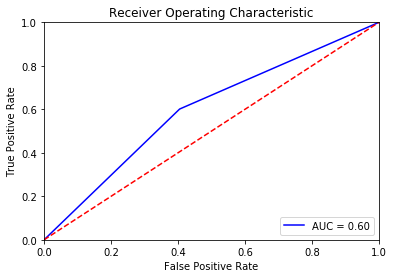

In [36]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [37]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = rf_under.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

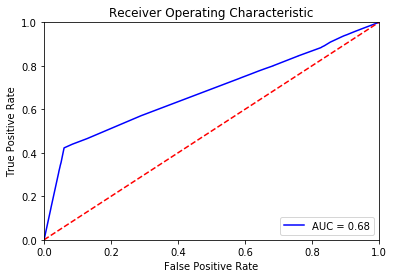

In [38]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## ROC Curves and AUC Values for All Datasets and Models

Resources: https://stackoverflow.com/questions/42894871/how-to-plot-multiple-roc-curves-in-one-plot-with-legend-and-auc-scores-in-python
https://www.statology.org/plot-multiple-roc-curves-python/

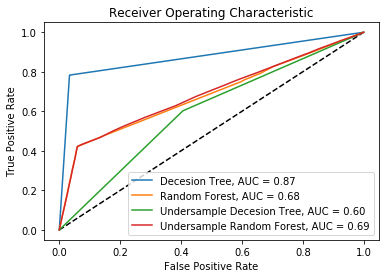

In [72]:
#ROC Curve
from sklearn.metrics import roc_curve
y_pred_prob1 = clf.predict_proba(X_test)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)
roc_auc1 = metrics.auc(fpr1, tpr1)

y_pred_prob2 = rf.predict_proba(X_test)[:,1]
fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)
roc_auc2 = metrics.auc(fpr2, tpr2)

#y_pred_prob3 = clf.predict_proba(X_test)[:,1]     #change clf to decision tree oversample model name
#fpr3 , tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)
#roc_auc3 = metrics.auc(fpr3, tpr3)

#y_pred_prob4 = rf.predict_proba(X_test)[:,1]      #Change rf to rf over model name
#fpr4 , tpr4, thresholds4 = roc_curve(y_test, y_pred_prob4)
#roc_auc4 = metrics.auc(fpr4, tpr4)

y_pred_prob5 = clf_under.predict_proba(X_test)[:,1]
fpr5 , tpr5, thresholds5 = roc_curve(y_test, y_pred_prob5)
roc_auc5 = metrics.auc(fpr5, tpr5)

y_pred_prob6 = rf_under.predict_proba(X_test)[:,1]
fpr6 , tpr6, thresholds6 = roc_curve(y_test, y_pred_prob6)
roc_auc6 = metrics.auc(fpr6, tpr6)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label = 'Decesion Tree, AUC = %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, label = 'Random Forest, AUC = %0.2f' % roc_auc2)
#plt.plot(fpr3, tpr3, label = 'Oversample Decesion Tree, AUC = %0.2f' % roc_auc3)
#plt.plot(fpr4, tpr4, label = 'Oversample Random Forest, AUC = %0.2f' % roc_auc4)
plt.plot(fpr5, tpr5, label = 'Undersample Decesion Tree, AUC = %0.2f' % roc_auc5)
plt.plot(fpr6, tpr6, label = 'Undersample Random Forest, AUC = %0.2f' % roc_auc6)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()